# Pymaceuticals Inc.
---

### Analysis
In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Based on the data we can see there was 2% more males (51%) than females (49%). Capomulin and Ramicane were the most used drugs yielding the most successful results with the least tumor volume. Propriva was the least used drug, yet Infubinol and Ceftamin were the least successful. 

Mouse ID 1509 was treated with Capomulin and the tumor volume decreased over 30 days. Other mice treated with the same regimen supports the assumption that Capomulin could reduce the size of tumor volume. 

There is a positive correlation between average weight and final tumor volume, with a value of 0.84. The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of the mouse.

Overall, a 30-day treatment with Capomulin or Ramicane would be a successful regimen to reduce tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"], how = "left")


# Display the data table for preview
pymaceuticals_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(pymaceuticals_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"] == "g989", :]
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pymaceuticals_df = pymaceuticals_df.drop(mouse_g989.index)
clean_pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_total = len(clean_pymaceuticals_df["Mouse ID"].unique())
new_total

248

## Summary Statistics

In [7]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_pymaceuticals_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

# Find the mean
mean = clean_pymaceuticals_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# Find the median
median = clean_pymaceuticals_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# Find the variance
variance = clean_pymaceuticals_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# Find the standard deviation
std = clean_pymaceuticals_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Find the SEM (standard error of mean)
SEM = clean_pymaceuticals_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({ "Tumor Volume Mean": mean, "Tumor Volume Median": median, "Tumor Volume Variance": variance, 
                                      "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.": SEM })


/var/folders/_q/kypfqfgn6xjb0cy2t8y7_nxc0000gn/T/ipykernel_60116/583458321.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_pymaceuticals_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/_q/kypfqfgn6xjb0cy2t8y7_nxc0000gn/T/ipykernel_60116/583458321.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_pymaceuticals_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/_q/kypfqfgn6xjb0cy2t8y7_nxc0000gn/T/ipykernel_60116/583458321.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future versio

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": SEM})
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_pymaceuticals_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

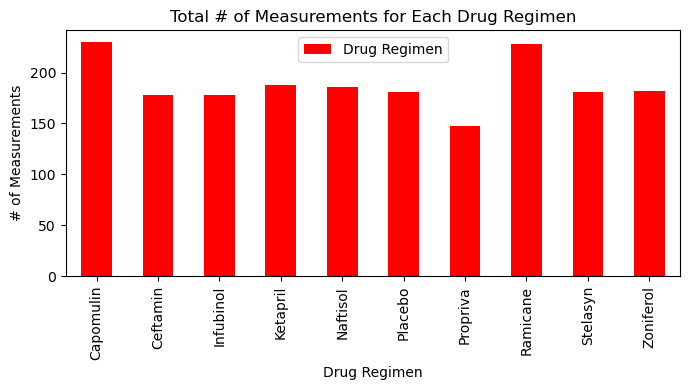

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_drug = clean_pymaceuticals_df.groupby("Drug Regimen")
drug_count = pd.DataFrame(grouped_drug["Drug Regimen"].count())
drug_bar = drug_count.plot(kind='bar', color="red", figsize=(7,4))
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
plt.tight_layout()
plt.show()

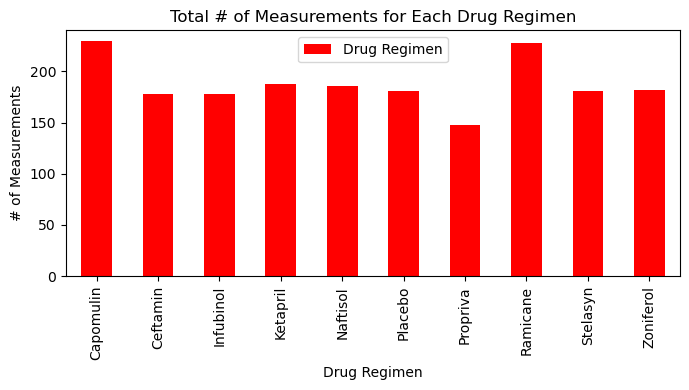

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))
tick_loc = [value for value in x_axis]
plt.figure(figsize=(7,4))
plt.bar(x_axis, drug_count["Drug Regimen"], color='red', alpha=1, align="center", width=0.5)
plt.xticks(tick_loc, list(drug_count.index), rotation='vertical')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_count["Drug Regimen"])+10)
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
drug_reg = ["Drug Regimen"]
plt.legend(drug_reg, loc="best")
plt.tight_layout()
plt.show()

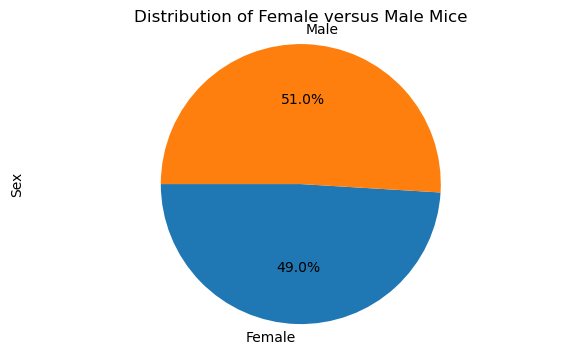

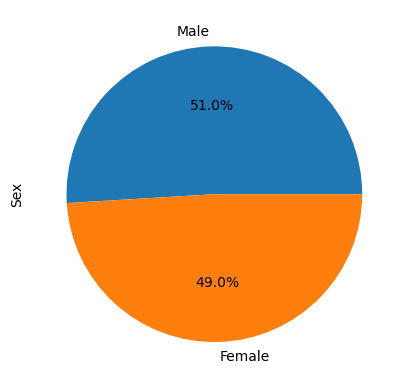

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group = clean_pymaceuticals_df.groupby('Sex')
# gender_count = pd.DataFrame(gender_group['Mouse ID'].nunique())
gender_count = pd.DataFrame(gender_group['Sex'].count())
# gender_count.head()

gender_count.plot(kind='pie', figsize=(7,4), y='Sex', title="Distribution of Female versus Male Mice",
startangle=180, autopct='%1.1f%%', legend=False)

plt.axis('equal')
plt.show()
# Find the distrubution of mice in each gender
gender = clean_pymaceuticals_df["Sex"].value_counts()

# Create the pie plot using Pandas
pandas_pie = gender.plot(kind = "pie", autopct = "%1.1f%%")

# Display the results
plt.show()


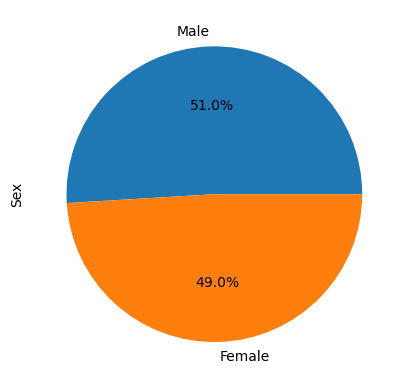

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels for the sections of our pie chart
labels = ["Male", "Female"]

# Create pie plot using pyplot
plt.pie(gender, labels = labels, autopct = "%1.1f%%")

# Create a title for the y-label
plt.ylabel("Sex")

# Display the results
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
max_timepoint = clean_pymaceuticals_df.groupby("Mouse ID")["Timepoint"].max()

# Create a DataFrame and reset the index
max_timepoint_df = pd.DataFrame(max_timepoint).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tv_df = pd.merge(max_timepoint_df, clean_pymaceuticals_df, on = ["Mouse ID", "Timepoint"])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tv = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = tv_df.loc[tv_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tv.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Print results
    print(f"{drug}'s potential outliers: {outliers} ")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


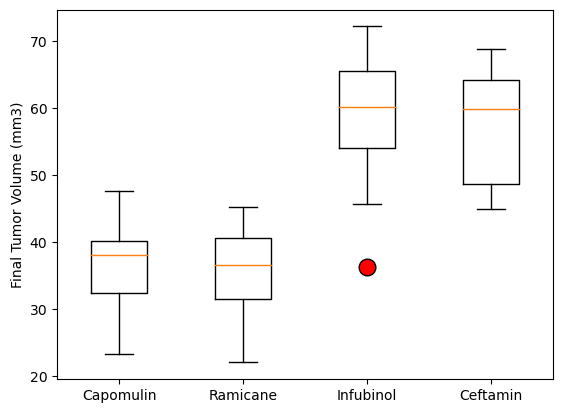

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tv, flierprops = dict(markerfacecolor = "red", markersize = 12))
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

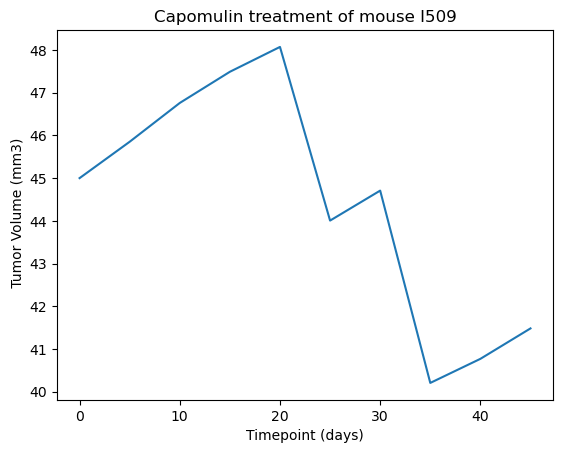

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create a DataFrame for a mouse treated with Capomulin
mouse_l509 = clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Mouse ID"] == "l509",:]

# Get the values for the x-axis and y-axis
x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]

# Create the line plot
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel(" Tumor Volume (mm3)")
plt.plot(x_axis,y_axis)
plt.show()

/var/folders/_q/kypfqfgn6xjb0cy2t8y7_nxc0000gn/T/ipykernel_60116/2420877854.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatterAverage= scatterData.groupby(["Mouse ID"]).mean()


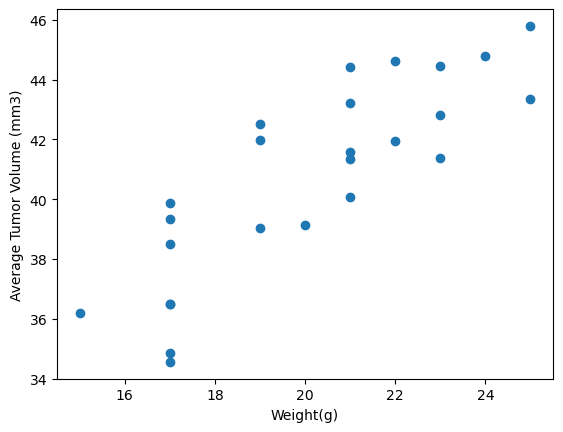

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatterData=clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"]=="Capomulin"]
scatterAverage= scatterData.groupby(["Mouse ID"]).mean()
plt.scatter(scatterAverage["Weight (g)"],scatterAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [18]:
from scipy.stats import linregress

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


/var/folders/_q/kypfqfgn6xjb0cy2t8y7_nxc0000gn/T/ipykernel_60116/2893406995.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatterAverage= scatterData.groupby(["Mouse ID"]).mean()


Text(0, 50, 'y = 0.95x + 21.55')

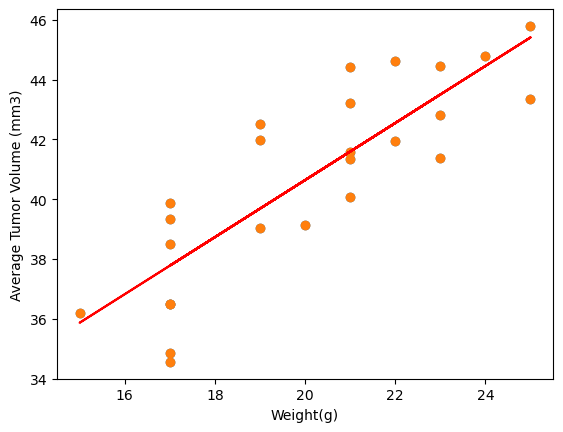

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
scatterData=clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"]=="Capomulin"]
scatterAverage= scatterData.groupby(["Mouse ID"]).mean()
plt.scatter(scatterAverage["Weight (g)"],scatterAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

#correlation coefficient
mouseWeight= scatterAverage["Weight (g)"]
avgTumorVol=scatterAverage["Tumor Volume (mm3)"]
correlation= st.pearsonr(mouseWeight,avgTumorVol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#linear regression
xValues= mouseWeight 
yValues= avgTumorVol
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15)